In [1]:
import pandas as pd
from processing_utils import *
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_result = pd.read_excel('/home/yx/3090/project/P_prediction/Data/肺部并发症预测/baseline_result/baseline_text_time.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '/home/yx/3090/project/P_prediction/Data/肺部并发症预测/baseline_result/baseline_text_time.xlsx'

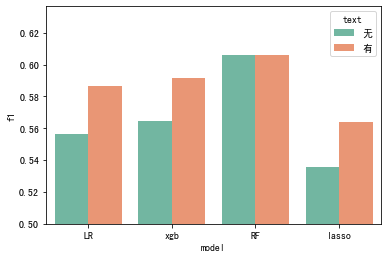

In [ ]:
get_fig(df_result, 'f1', 0.5)

In [17]:
df = pd.read_pickle('/home/yx/3090/project/P_prediction/Data/肺部并发症预测/data_time.pkl')

In [18]:
text =  df.pop('术前诊断').astype(str)
y = df.pop('肺部并发症').values
df = fill_value(df, 'mean')

In [19]:
df_train, df_test, y_train, y_test = time_split(df, y, 13904)

In [20]:
df_results = []
for model_name in ['LR', 'xgb', 'RF', 'lasso']:
    if model_name == 'LR':
        df_train = df_train[['年龄_术中', '氧饱和度', '近1月呼吸系统感染病史', '血红蛋白', '手术风险评估_手术部位', '手术时长（分钟）', '急诊/择期']]
        df_test = df_test[['年龄_术中', '氧饱和度', '近1月呼吸系统感染病史', '血红蛋白', '手术风险评估_手术部位', '手术时长（分钟）', '急诊/择期']]
    if model_name == 'LR' or model_name == 'lasso':
        df_train = StandardScaler(df_train)
        df_test = StandardScaler(df_test)
    df_result = train(model_name, df_train, y_train, df_test, y_test, None, text, "None")
    df_result['model'] = model_name
    df_result['text'] = 'no'
    df_results.append(df_result)


LR

precision:    0.37853 	 recall:    0.44224 	 f1:    0.40791 	 accuracy:    0.88705 	 aucprc:    0.41929 	 aucroc:    0.82761 	 NPV:    0.94516 	 Specificity:    0.93016 	 
precision:    0.41901 	 recall:    0.39274 	 f1:    0.40545 	 accuracy:    0.89864 	 aucprc:    0.42202 	 aucroc:    0.82953 	 NPV:    0.94164 	 Specificity:    0.94762 	 
precision:    0.41077 	 recall:    0.40264 	 f1:    0.40667 	 accuracy:    0.89661 	 aucprc:    0.42184 	 aucroc:    0.82920 	 NPV:    0.94235 	 Specificity:    0.94444 	 
precision:    0.42049 	 recall:    0.39274 	 f1:    0.40614 	 accuracy:    0.89893 	 aucprc:    0.42233 	 aucroc:    0.82946 	 NPV:    0.94166 	 Specificity:    0.94794 	 
precision:    0.28458 	 recall:    0.71287 	 f1:    0.40678 	 accuracy:    0.81726 	 aucprc:    0.42415 	 aucroc:    0.82987 	 NPV:    0.96735 	 Specificity:    0.82762 	 

xgb

precision:    0.32190 	 recall:    0.65017 	 f1:    0.43060 	 accuracy:    0.91225 	 aucprc:    0.50138 	 aucroc:    0.75921 	 NP

In [21]:
for model_name in [ 'LR', 'xgb', 'RF', 'lasso']:
    if model_name == 'LR':
            df_train = df_train[['年龄_术中', '氧饱和度', '近1月呼吸系统感染病史', '血红蛋白', '手术风险评估_手术部位', '手术时长（分钟）', '急诊/择期']]
            df_test = df_test[['年龄_术中', '氧饱和度', '近1月呼吸系统感染病史', '血红蛋白', '手术风险评估_手术部位', '手术时长（分钟）', '急诊/择期']]
    if model_name == 'LR' or model_name == 'lasso':
        df_train = StandardScaler(df_train)
        df_test = StandardScaler(df_test)
    df_result = train(model_name, df_train, y_train, df_test, y_test, "text", text, "None")
    df_result['model'] = model_name
    df_result['text'] = 'yes'
    df_results.append(df_result)


LR

precision:    0.38806 	 recall:    0.60066 	 f1:    0.47150 	 accuracy:    0.88155 	 aucprc:    0.38317 	 aucroc:    0.84178 	 NPV:    0.95913 	 Specificity:    0.90889 	 
precision:    0.40576 	 recall:    0.51155 	 f1:    0.45255 	 accuracy:    0.89111 	 aucprc:    0.38137 	 aucroc:    0.84157 	 NPV:    0.95150 	 Specificity:    0.92794 	 
precision:    0.37195 	 recall:    0.60396 	 f1:    0.46038 	 accuracy:    0.87547 	 aucprc:    0.38316 	 aucroc:    0.84752 	 NPV:    0.95915 	 Specificity:    0.90190 	 


In [ ]:
df_results_data = pd.concat(df_results)

In [ ]:
df_results_data

,precision,recall,f1,accuracy,aucprc,aucroc,NPV,Specificity,model,text
均值,0.462581,0.700149,0.556538,0.828540,0.554281,0.840372,0.939880,0.851870,LR,无
置信区间-左,0.440382,0.665745,0.535699,0.819672,0.531120,0.837589,0.936612,0.836850,LR,无
置信区间-右,0.484779,0.734554,0.577376,0.837408,0.577442,0.843156,0.943149,0.866889,LR,无
均值,0.645652,0.501617,0.564515,0.846304,0.611933,0.725861,0.846304,1.000000,xgb,无
置信区间-左,0.628775,0.496971,0.556297,0.836488,0.600505,0.722913,0.836488,1.000000,xgb,无
置信区间-右,0.662530,0.506264,0.572734,0.856119,0.623361,0.728810,0.856119,1.000000,xgb,无
均值,0.636357,0.579022,0.606316,0.846304,0.639010,0.760190,0.846304,1.000000,RF,无
置信区间-左,0.619055,0.565376,0.591332,0.836488,0.623034,0.753398,0.836488,1.000000,RF,无
置信区间-右,0.653660,0.592667,0.621301,0.856119,0.654986,0.766982,0.856119,1.000000,RF,无
均值,0.419770,0.741333,0.535740,0.802574,0.542278,0.835579,0.945026,0.814072,lasso,无


In [11]:
df_results_data.to_excel('/home/yx/3090/project/P_prediction/Data/肺部并发症预测/baseline_result/baseline_text_time.xlsx')